In [25]:
from astropy.io import fits
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import astropy_mpl_style
from skimage.measure import profile_line
plt.style.use(astropy_mpl_style)
%matplotlib inline  
import MosaicFitsReader as mfr

In [2]:
def return_mosaic(infile):
    # Set output image size 
    oxsize = 4096 
    oysize = 4623 

    # Set input image size 
    ixsize = 4096 
    iysize = 1155 

    # Create a numpy array with zeros 

    outimage = np.zeros((oxsize,oysize)) 

    # Open the fits file readonly by default and create an input hdulist 

    inlist = fits.open("test_images/"+infile) 
    inlist.info()
    nimages = len(inlist) - 1 
    print ("Number of images: %d\n" % (nimages))
    if (nimages < 1): 
      print ("This file does not appear to be a FITS MEF file." )
      return

    # Merge  the extension images into one numpy array 
    # The pattern here depends on how the images were placed in the MEF 
    print("add extentions")
    outimage[0:ixsize,0:iysize] = inlist[1].data 
    outimage[0:ixsize,iysize+1:iysize*2+1] = inlist[2].data 
    outimage[0:ixsize,iysize*2+2:iysize*3+2] = inlist[3].data 
    outimage[0:ixsize,iysize*3+3:iysize*4+3] = inlist[4].data 

    return outimage

In [3]:
images = ['bfoc0008.fits','bfoc0009.fits','bfoc0010.fits','bfoc0011.fits','bfoc0011.fits','bfoc0012.fits','bfoc0013.fits']

In [7]:
results = np.array([])
for image in images:
    image_data = return_mosaic(image)
    profile=profile_line(image_data,(100,300),(4000,300),10)
    profile = profile-np.median(profile)
    print(profile.max())
    results = np.append(results,profile.max())
    

Filename: test_images/bfoc0008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     720   ()      
  1  VidInp1       1 ImageHDU       360   (1155, 4096)   int16 (rescales to uint16)   
  2  VidInp2       1 ImageHDU       360   (1155, 4096)   int16 (rescales to uint16)   
  3  VidInp3       1 ImageHDU       360   (1155, 4096)   int16 (rescales to uint16)   
  4  VidInp4       1 ImageHDU       360   (1155, 4096)   int16 (rescales to uint16)   
Number of images: 4

add extentions
2.5
Filename: test_images/bfoc0009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     720   ()      
  1  VidInp1       1 ImageHDU       360   (1155, 4096)   int16 (rescales to uint16)   
  2  VidInp2       1 ImageHDU       360   (1155, 4096)   int16 (rescales to uint16)   
  3  VidInp3       1 ImageHDU       360   (1155, 4096)   int16 (rescales to uint16)   
  4  VidInp4       1 ImageHDU       360   (1155, 4096

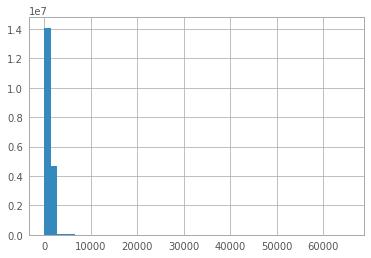

In [9]:
NBINS = 50
histogram = plt.hist(image_data.flatten(), NBINS)

In [10]:
import skimage

In [11]:
profile=skimage.measure.profile_line(image_data,(100,300),(4000,300),10)

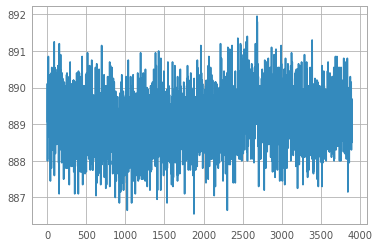

In [12]:
plt.plot(profile)

In [56]:
numpy.median(profile)

1404.7

In [57]:
profile = profile-numpy.median(profile)

In [58]:
profile

array([-22.7, -23.7, -23.5, ..., -19.3, -17.6, -19.4])

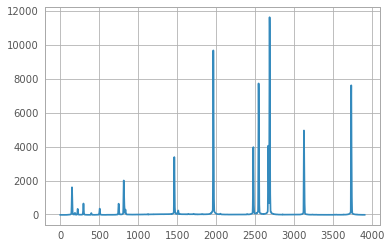

In [59]:
plt.plot(profile)

Code supplied by Kyle

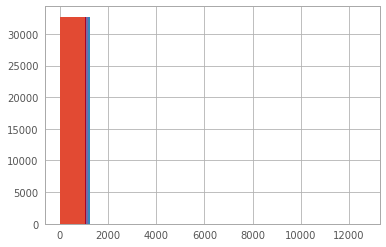

In [35]:
points = []
min_row = 10
max_row = 4000
min_column = 1750
max_column = 1850
for file in images:
        ffile = mfr.MosaicFitsReader("test_images/"+file)
        data = ffile.data
        focus = ffile.getKeyword('BLUFOCUS')
        region = data[min_row:max_row, min_column:max_column]
        region = region.astype (int)
        flat = region.flatten ()
        flat = list (flat)     # 10% overall speedup by using a list.

        minimum = min (flat)
        maximum = max (flat)


       # Pixel values are 16-bit integers. The bias floor is typically
       # a hair less than a thousand, and a well-saturated pixel for
       # the dewar focus series is in the neighborhood of 14,000.
       # Anything over twice the nominal useful range is not real 
	# data.

        histogram = [0,] * (32768 + 1)

        for number in flat:
               if number <= 32768:
                       histogram[number] += 1

        histogram = np.array (histogram)
        plt.hist(histogram)
        deviation = histogram.std ()
        points.append ((focus, deviation))

In [34]:
points

[(-3717.99633789, 284.85008048344685),
 (-3628.32397461, 271.87026654161423),
 (-3539.27026367, 268.4340508857494),
 (-3449.59814453, 264.32137524993283),
 (-3449.59814453, 264.32137524993283),
 (-3359.30737305, 262.26288115565137),
 (-3269.63525391, 261.12191372719735)]